# **# 2.**

로지스틱 회귀 방법을 사용하여 3개의 클라스 라벨들 (Kama, Rosa, Canadian) 을 구분하는 결정 경계선을 구하는 코드를 작성하시오 (One-vs-All 방식 사용)

In [45]:
# 데이터 불러오기

# 구글 코랩 <-> 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/과제1.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import numpy as np
# 변수 지정
x1 = np.array(data['X1 kernel_area'], dtype = np.dtype('float64'))

x2 = np.array(data['X2 kernel_length'])
for i in range(len(x2)):
  x2[i] = float(x2[i].replace(',',''))   ### str -> float 변경할 때 : 천의 구분단위(,) 없애야함
x2 = np.array(x2, dtype = np.dtype('float64'))

y = np.array(data['Wheat Varieties'])
for i in range(len(y)):
  y[i] = str(y[i].replace(' ',''))   ### 문자열에서 ' ' 없애주기
y = np.array(y, dtype = np.dtype('O')) 

# 특징값 스케일링(feature scaling)
x1_scaled = (x1 - np.mean(x1)) / np.std(x1)
x2_scaled = (x2 - np.mean(x2)) / np.std(x2)

In [47]:
# 행렬로 변환
x1_scaled = x1_scaled.reshape(210,1)
x2_scaled = x2_scaled.reshape(210,1)
input = np.concatenate((x1_scaled,x2_scaled),axis=1)
y = y.reshape(210,1)

# 클라스 라벨들 1개씩을 중심으로(One-vs-All) 이진 분류로 바꾸기
yKama = np.where(y == 'Kama', 1, 0)
yRosa = np.where(y == 'Rosa', 1, 0)
yCanadian = np.where(y == 'Canadian', 1, 0)

# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

## Kama(One)와 그 외(All)
lr1 = LogisticRegression()
lr1.fit(input,yKama)
## Rosa(One)와 그 외(All)
lr2 = LogisticRegression()
lr2.fit(input,yRosa)
## Canadian(One)와 그 외(All)
lr3 = LogisticRegression()
lr3.fit(input,yCanadian)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

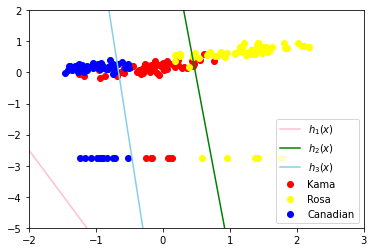

In [48]:
# y값의 종류에 따른 index 모으기
Kama_index = (y == 'Kama')
Rosa_index = (y == 'Rosa')
Canadian_index = (y == 'Canadian')

# 그래프 그리기
import matplotlib.pyplot as plt

plt.scatter(x1_scaled[Kama_index],x2_scaled[Kama_index], c='red')
plt.scatter(x1_scaled[Rosa_index],x2_scaled[Rosa_index], c='yellow')
plt.scatter(x1_scaled[Canadian_index],x2_scaled[Canadian_index], c='blue')

x=np.arange(-3,3,0.1)
plt.plot(x,(((-1)*(lr1.coef_[0][0]*x)-lr1.intercept_[0])/lr1.coef_[0][1]), c = 'pink')
plt.plot(x,(((-1)*(lr2.coef_[0][0]*x)-lr2.intercept_[0])/lr2.coef_[0][1]), c = 'green')
plt.plot(x,(((-1)*(lr3.coef_[0][0]*x)-lr3.intercept_[0])/lr3.coef_[0][1]), c = 'skyblue')

plt.axis(xmin = -2, xmax = 3, ymin = -5, ymax = 2)
plt.legend(['$h_1(x)$','$h_2(x)$','$h_3(x)$','Kama','Rosa','Canadian'])
plt.show()
